# 1.PROBLEM STATEMENT




The dataset includes the following features:

1. Name: The model name of the car.
2. Company: The manufacturer or brand of the car.
3. Year: The manufacturing year of the car.
4. Price: The selling price of the car in Indian Rupees.
5. Kms Driven: The total kilometers driven by the car.
6. Fuel Type: The type of fuel used by the car (e.g.,Petrol, Diesel, CNG, Electric).


















8. here the datasets is about used car prices

9. company name,car name,fuel type,year,km driven,price are given

10. the target variable in this data set is price of the car



# 2.UNDERSTANDING  THE DATA

In [ ]:
#  import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read dataset
df=pd.read_csv('car.csv')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [ ]:
print(f'duplicate{df.duplicated().sum()}\n\n')
print(f'missing value\n{df.isnull().sum()}\n\n')
print(f'{df.info()}\n\n')
print(f'{df.describe()}\n\n')
print(f'{df.shape}\n\n')
print(f'{df.columns}\n\n')
print(f'{df.index}\n\n')

duplicate94


missing value
name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB
None


              name company  year          Price  kms_driven fuel_type
count          892     892   892            892         840       837
unique         525      48    61            274         258         3
top     Honda City  Maruti  2015  Ask For Price  45,000 kms    Petrol
freq            13     235   117             35          30       440


(892, 6)


Index(['name', 'comp

#3.CLEANING DATA

In [ ]:
df.rename(columns={'Price':'price'},inplace=True)

In [ ]:
# drop duplicate value and null value
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)



print(f'duplicates  - {df.duplicated().sum()}\n\n')
print(f'missing value\n{df.isnull().sum()}\n\n')

duplicates  - 0


missing value
name          0
company       0
year          0
price         0
kms_driven    0
fuel_type     0
dtype: int64




##3.1 covert string to integer

### 3.1.1 kms_driven

In [ ]:
df['kms_driven'].unique().sum()

'45,000 kms40 kms22,000 kms28,000 kms36,000 kms59,000 kms41,000 kms25,000 kms24,530 kms60,000 kms30,000 kms32,000 kms48,660 kms4,000 kms16,934 kms43,000 kms35,550 kms39,522 kms39,000 kms55,000 kms72,000 kms15,975 kms70,000 kms23,452 kms35,522 kms48,508 kms15,487 kms82,000 kms20,000 kms68,000 kms38,000 kms27,000 kms33,000 kms46,000 kms16,000 kms47,000 kms35,000 kms30,874 kms15,000 kms29,685 kms1,30,000 kms19,000 kms54,000 kms13,000 kms38,200 kms50,000 kms13,500 kms3,600 kms45,863 kms60,500 kms12,500 kms18,000 kms13,349 kms29,000 kms44,000 kms42,000 kms14,000 kms49,000 kms36,200 kms51,000 kms1,04,000 kms33,333 kms33,600 kms5,600 kms7,500 kms24,330 kms65,480 kms28,028 kms2,00,000 kms99,000 kms2,800 kms21,000 kms11,000 kms66,000 kms3,000 kms7,000 kms38,500 kms37,200 kms43,200 kms24,800 kms45,872 kms40,000 kms11,400 kms97,200 kms52,000 kms31,000 kms1,75,430 kms37,000 kms65,000 kms3,350 kms75,000 kms62,000 kms73,000 kms2,200 kms54,870 kms34,580 kms97,000 kms60 kms80,200 kms3,200 kms0,000 kms

In [ ]:

# replace kms_driven values
df['kms_driven']=df['kms_driven'].str.replace(',','')
df['kms_driven']=df['kms_driven'].str.replace('kms','')

In [ ]:
#str  to int
df['kms_driven'] = df['kms_driven'].astype(int)

### 3.1.2 price

In [ ]:
df['price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [ ]:

df['price']=df['price'].str.replace(',','')
df=df[~(df['price']=='Ask For Price')]

In [ ]:
df['price']=df['price'].astype('int')
df.dtypes

<ipython-input-47-391cb9248789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']=df['price'].astype('int')


,0
name,object
company,object
year,object
price,int64
kms_driven,int64
fuel_type,object


###3.1.3 year

In [ ]:
#year dtype convert to integer
df['year']=df['year'].astype('int')
df.dtypes

<ipython-input-48-078f7b76145a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['year'].astype('int')


,0
name,object
company,object
year,int64
price,int64
kms_driven,int64
fuel_type,object


In [ ]:
df

,name,company,year,price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


## 3.2encoding

In [ ]:
df.columns

Index(['name', 'company', 'year', 'price', 'kms_driven', 'fuel_type'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['name']=labelencoder.fit_transform(df['name'])
df['company']=labelencoder.fit_transform(df['company'])
df['fuel_type']=labelencoder.fit_transform(df['fuel_type'])


<ipython-input-51-5a323f20fdcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name']=labelencoder.fit_transform(df['name'])
<ipython-input-51-5a323f20fdcb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company']=labelencoder.fit_transform(df['company'])
<ipython-input-51-5a323f20fdcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
df.dtypes

,0
name,int64
company,int64
year,int64
price,int64
kms_driven,int64
fuel_type,int64


#4.Visualization

array([[<Axes: title={'center': 'name'}>,
        <Axes: title={'center': 'company'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'kms_driven'}>,
        <Axes: title={'center': 'fuel_type'}>]], dtype=object)

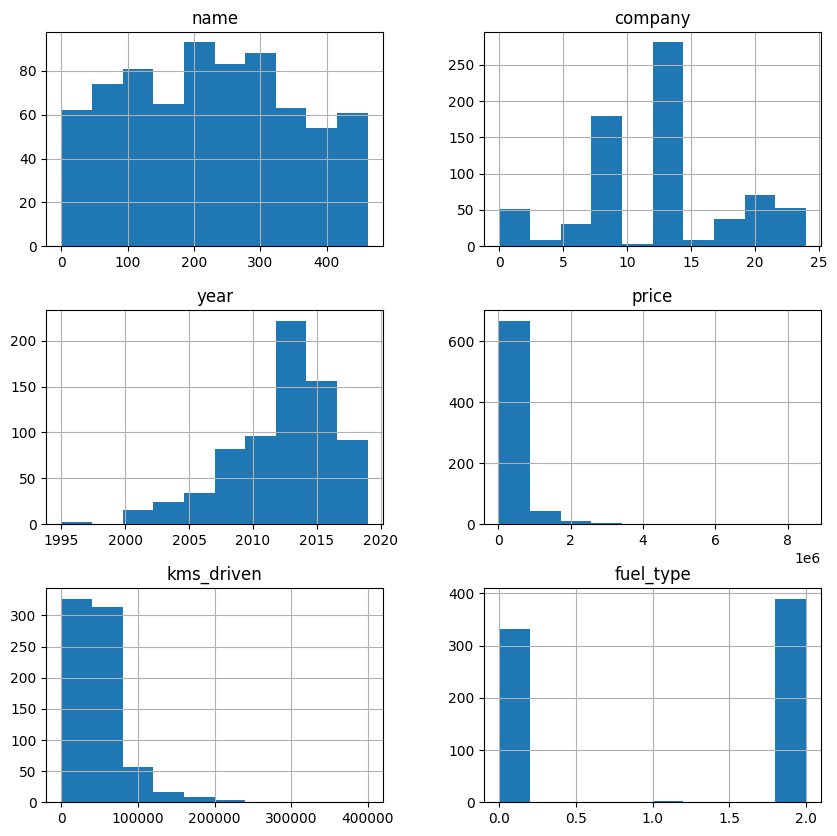

In [ ]:
df.hist(figsize=(10,10))

## 4.1skwness

In [ ]:

print(df['name'].skew())
print(df['company'].skew())
print(df['year'].skew())
print(df['price'].skew())
print(df['kms_driven'].skew())
print(df['fuel_type'].skew())


0.058641537977873116
-0.07479162891554371
-0.9566551946202199
8.027194273392052
2.7178342451502857
-0.1610710417422659


In [ ]:
df['name']=np.log1p(df['name'])
df['company']=np.log1p(df['company'])
df['year']=np.log1p(df['year'])
df['price']=np.log1p(df['price'])
df['kms_driven']=np.log1p(df['kms_driven'])
df['fuel_type']=np.log1p(df['fuel_type'])

<ipython-input-55-d22e79520257>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name']=np.log1p(df['name'])
<ipython-input-55-d22e79520257>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company']=np.log1p(df['company'])
<ipython-input-55-d22e79520257>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:

print(df['name'].skew())
print(df['company'].skew())
print(df['year'].skew())
print(df['price'].skew())
print(df['kms_driven'].skew())
print(df['fuel_type'].skew())

-1.8577031325418567
-1.8801592036784929
-0.962866697057709
0.019580072290472705
-4.240949562126053
-0.16321953652917046


array([[<Axes: title={'center': 'name'}>,
        <Axes: title={'center': 'company'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'kms_driven'}>,
        <Axes: title={'center': 'fuel_type'}>]], dtype=object)

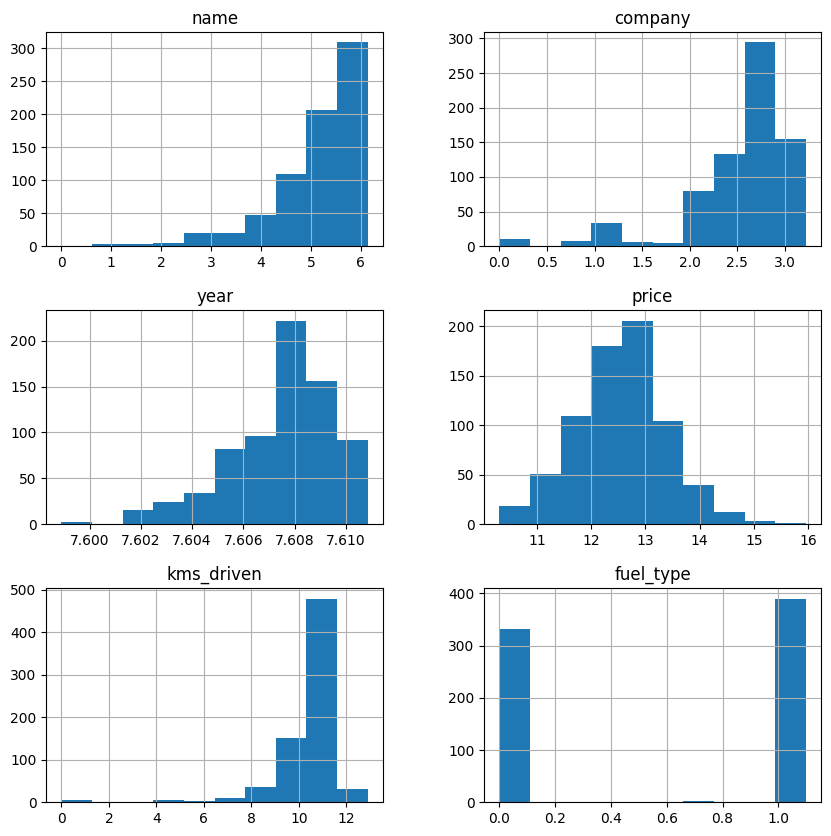

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
df.columns

Index(['name', 'company', 'year', 'price', 'kms_driven', 'fuel_type'], dtype='object')

##4.3 boxplot

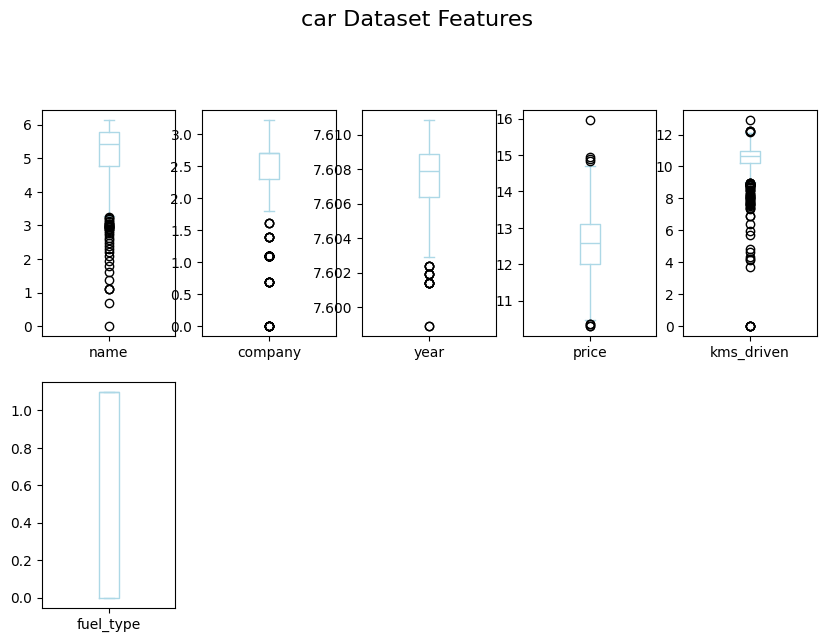

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,5), figsize=(10,10),
color='lightblue')
plt.suptitle('car Dataset Features', fontsize=16)
plt.show()

In [ ]:
# name
q1=df['name'].quantile(0.25)
q2=df['name'].quantile(0.50)
q3=df['name'].quantile(0.75)

iqr=q3-q1
df = df[(df['name'] >= (q1 - 1.5 * iqr)) & (df['name'] <= (q3 + 1.5 * iqr))]





# company
q1=df['company'].quantile(0.25)
q2=df['company'].quantile(0.50)
q3=df['company'].quantile(0.75)

iqr=q3-q1
df = df[(df['company'] >= (q1 - 1.5 * iqr)) & (df['company'] <= (q3 + 1.5 * iqr))]


# year
q1=df['year'].quantile(0.25)
q2=df['year'].quantile(0.50)
q3=df['year'].quantile(0.75)

iqr=q3-q1
df = df[(df['year'] >= (q1 - 1.5 * iqr)) & (df['year'] <= (q3 + 1.5 * iqr))]





# # price
# q1=df['price'].quantile(0.25)
# q2=df['price'].quantile(0.50)
# q3=df['price'].quantile(0.75)

# iqr=q3-q1
# df = df[(df['price'] >= (q1 - 1.5 * iqr)) & (df['price'] <= (q3 + 1.5 * iqr))]





# kms_driven
q1=df['kms_driven'].quantile(0.25)
q2=df['kms_driven'].quantile(0.50)
q3=df['kms_driven'].quantile(0.75)

iqr=q3-q1
df = df[(df['kms_driven'] >= (q1 - 1.5 * iqr)) & (df['kms_driven'] <= (q3 + 1.5 * iqr))]



# fuel_types
q1=df['fuel_type'].quantile(0.25)
q2=df['fuel_type'].quantile(0.50)
q3=df['fuel_type'].quantile(0.75)

iqr=q3-q1
df = df[(df['fuel_type'] >= (q1 - 1.5 * iqr)) & (df['fuel_type'] <= (q3 + 1.5 * iqr))]




# Optionally, reset the index
df.reset_index(drop=True, inplace=True)

##4.2 Data scaling

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# # Standardization (mean = 0, std = 1)
# scaler = StandardScaler()
# df[['name', 'company', 'year', 'kms_driven', 'fuel_type' ]] = scaler.fit_transform(df[['name', 'company', 'year',  'kms_driven', 'fuel_type']])

In [ ]:
 df

,name,company,year,price,kms_driven,fuel_type
0,4.948760,2.302585,7.604894,11.289794,10.714440,1.098612
1,4.867534,2.302585,7.608374,12.691584,10.239996,1.098612
2,3.931826,1.945910,7.608374,13.262127,10.491302,0.000000
3,4.060443,1.945910,7.607381,12.072547,10.621352,0.000000
4,4.744932,2.302585,7.607878,12.154785,10.126671,1.098612
...,...,...,...,...,...,...
578,5.631212,2.708050,7.606885,12.506181,10.819798,1.098612
579,5.932245,3.091042,7.605890,11.608245,10.308986,0.000000
580,6.049733,3.135494,7.605890,12.611541,11.790565,1.098612
581,6.045005,3.091042,7.610358,12.468441,10.203629,0.000000


## 4.4correlation

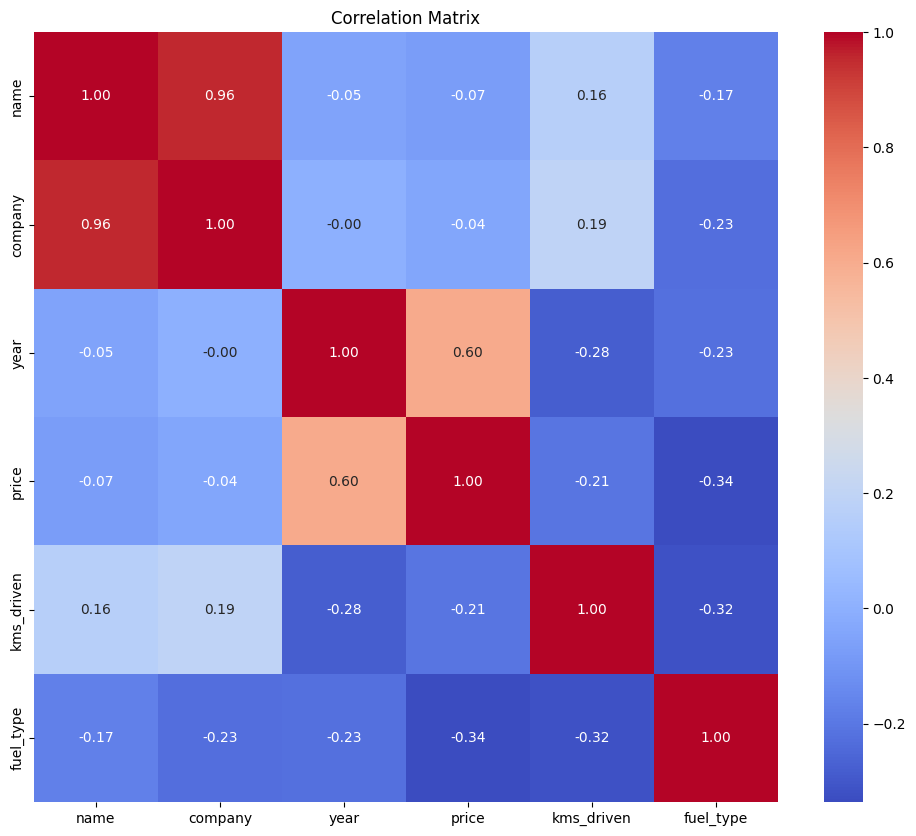

In [ ]:
c = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(c, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#modeling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score





# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
x=df.drop(columns="price")
y=df['price']



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
results = {}

# Apply each model and compute metrics
for name, model in models.items():
    # Standardized value is only applied to support vector regressor and Neural network
    model.fit(x_train, y_train)

    # Predict based on x_test for all models to compare with y_test
    y_pred = model.predict(x_test)

    # Compute evaluation metrics
    mae, rmse, r2 = evaluate_model(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         0.408582  0.591978  0.470327
Ridge Regression          0.513591  0.700243  0.258871
Lasso Regression          0.609873  0.817203 -0.009385
ElasticNet Regression     0.609873  0.817203 -0.009385
Decision Tree             0.430938  0.637174  0.386362
Random Forest             0.338382  0.489830  0.637350
Gradient Boosting         0.298949  0.440023  0.707351
Support Vector Regressor  0.516148  0.707635  0.243142
K-Nearest Neighbors       0.524706  0.699802  0.259803
Neural Network            0.856765  1.086677 -0.784832


In [ ]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 0.30
R-squared: 0.71
Mean Squared Error: 0.19


#Documentaion and report



##1. Problem Statement
The aim of this analysis is to predict the selling price of used cars based on the features provided in the dataset. The features include:

Name: Model name of the car.
Company: Manufacturer or brand of the car.
Year: Manufacturing year.
Price: Selling price of the car (target variable).
Kms Driven: Total kilometers the car has been driven.
Fuel Type: Type of fuel used (Petrol, Diesel, CNG, Electric).







##2. Understanding the Data
The dataset was loaded and inspected for duplicates, missing values, and the data types of each column. A summary of key details includes:

Duplicates: Removed any duplicate entries.
Missing Values: Rows with null values were dropped.
After cleaning, the following checks were performed:

Data Types: Columns were converted to appropriate types, such as converting kms_driven and price to integers.
Encoding Categorical Variables: Label encoding was applied to categorical features (name, company, and fuel_type) to convert them into numerical values for machine learning.



##3. Data Cleaning and Transformation
The following steps were applied to prepare the dataset for modeling:

Handling Skewness: Log transformations were applied to reduce skewness in numerical features (name, company, year, price, kms_driven, and fuel_type).
Outlier Removal: Outliers in each feature were identified and removed using the Interquartile Range (IQR) method.
Scaling: Standard scaling was applied to standardize the numerical values.
##4. Exploratory Data Analysis (EDA)
4.1. Histograms
Histograms were created to visualize the distribution of each feature, helping to identify skewness and the presence of outliers.

4.2. Boxplots
Boxplots were plotted for each feature to observe the spread and detect any potential outliers.

4.3. Correlation Matrix
A correlation matrix was generated to understand the relationships between the features. The heatmap provided insights into feature dependencies, highlighting features that may influence car price predictions.

##5. Model Training and Evaluation
A set of regression algorithms was trained to predict the target variable, price. The models included:

Linear Regression
Ridge Regression
Lasso Regression
ElasticNet Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regressor
K-Nearest Neighbors
Neural Network Regressor (MLP)
Each model was evaluated using the following metrics:

Mean Absolute Error (MAE): Indicates the average magnitude of errors in the predictions.
Root Mean Squared Error (RMSE): Penalizes larger errors more than MAE.
R² (R-squared): Represents the proportion of variance explained by the model, where higher values indicate better performance.

Best Performing Model
Gradient Boosting Regressor performed the best, achieving an R² score of 0.71, indicating that it explained  of the variance in car prices. Its MAE and RMSE were also comparatively low, showing it could provide accurate predictions.

##6. Conclusion
The Gradient Boosting model effectively predicts the prices of used cars based on the provided features. It demonstrated strong predictive power due to its ability to model complex relationships in the data. The model could be further refined with additional feature engineering, hyperparameter tuning, and cross-validation.

Recommendations
Feature Engineering: Adding features such as car age (derived from year) or brand popularity may improve predictions.
Further Tuning: Hyperparameter tuning for Gradient Boosting could further enhance performance.
Deploy Model: Consider deploying this model in a production environment to predict prices for new data.